In [1]:
include("../src/PhasorNetworks.jl")
using .PhasorNetworks

In [2]:
using Plots

In [3]:
sa = SpikingArgs()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)


In [4]:
using Statistics: mean

In [5]:
offsets = 0.0:0.25:1.0 |> collect

5-element Vector{Float64}:
 0.0
 0.25
 0.5
 0.75
 1.0

In [6]:
phases = -1.0:0.01:1.0 |> collect

201-element Vector{Float64}:
 -1.0
 -0.99
 -0.98
 -0.97
 -0.96
 -0.95
 -0.94
 -0.93
 -0.92
 -0.91
 -0.9
 -0.89
 -0.88
  ⋮
  0.89
  0.9
  0.91
  0.92
  0.93
  0.94
  0.95
  0.96
  0.97
  0.98
  0.99
  1.0

In [7]:
# phase to time

In [8]:
tms = [phase_to_time(phases, spk_args=sa, offset=o) for o in offsets]

5-element Vector{Vector{Float64}}:
 [0.0, 0.0050000000000000044, 0.010000000000000009, 0.015000000000000013, 0.020000000000000018, 0.025000000000000022, 0.030000000000000027, 0.034999999999999976, 0.03999999999999998, 0.044999999999999984  …  0.9550000000000001, 0.96, 0.9650000000000001, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0]
 [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295  …  1.205, 1.21, 1.215, 1.22, 1.225, 1.23, 1.2349999999999999, 1.24, 1.245, 1.25]
 [0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.5349999999999999, 0.54, 0.5449999999999999  …  1.455, 1.46, 1.465, 1.47, 1.475, 1.48, 1.4849999999999999, 1.49, 1.495, 1.5]
 [0.75, 0.755, 0.76, 0.765, 0.77, 0.775, 0.78, 0.7849999999999999, 0.79, 0.7949999999999999  …  1.705, 1.71, 1.715, 1.72, 1.725, 1.73, 1.7349999999999999, 1.74, 1.745, 1.75]
 [1.0, 1.005, 1.01, 1.0150000000000001, 1.02, 1.025, 1.03, 1.035, 1.04, 1.045  …  1.955, 1.96, 1.965, 1.97, 1.975, 1.98, 1.9849999999999999, 1.99, 1.995, 2.0]

In [9]:
phase_tms = [time_to_phase(tms[i], spk_args=sa, offset=o) for (i,o) in enumerate(offsets)]

5-element Vector{Vector{Float64}}:
 [-1.0, -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92, -0.91  …  0.9100000000000001, 0.9199999999999999, 0.9300000000000002, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, -1.0]
 [-1.0, -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92, -0.91  …  0.9100000000000001, 0.9199999999999999, 0.9300000000000002, 0.94, 0.9500000000000002, 0.96, 0.9699999999999998, 0.98, 0.9900000000000002, -1.0]
 [-1.0, -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.9300000000000002, -0.9199999999999999, -0.9100000000000001  …  0.9100000000000001, 0.9199999999999999, 0.9300000000000002, 0.94, 0.9500000000000002, 0.96, 0.9699999999999998, 0.98, 0.9900000000000002, -1.0]
 [-1.0, -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.9300000000000002, -0.9199999999999999, -0.9100000000000001  …  0.9100000000000001, 0.9199999999999999, 0.9300000000000002, 0.94, 0.9500000000000002, 0.96, 0.9699999999999998, 0.98, 0.9900000000000002, -1.0]
 [-1.0, -0.9900000000000002, -0.98, -0.969999999999

In [10]:
e0 = [maximum(arc_error(phases .- p)) for p in phase_tms]

5-element Vector{Float64}:
 3.487868498008632e-16
 6.975736996017264e-16
 8.719671245021579e-16
 8.719671245021579e-16
 8.719671245021579e-16

In [11]:
# phase to train

In [12]:
trains = [phase_to_train(phases, spk_args=sa, offset=o) for o in offsets];

In [13]:
train_to_phase(trains[2], sa)

2×201 Matrix{Float64}:
  -1.0   -0.99   -0.98   -0.97   -0.96  …    0.97    0.98    0.99  NaN
 NaN    NaN     NaN     NaN     NaN        NaN     NaN     NaN      -1.0

In [14]:
rec_phases = [train_to_phase(t, sa) for t in trains];

In [15]:
e1 = [mapslices(x -> x .- phases, t, dims=(2)) for t in rec_phases]

5-element Vector{Matrix{Float64}}:
 [0.0 0.0 … 0.0 NaN; NaN NaN … NaN -2.0]
 [0.0 0.0 … 2.220446049250313e-16 NaN; NaN NaN … NaN -2.0]
 [0.0 0.0 … 2.220446049250313e-16 NaN; NaN NaN … NaN -2.0]
 [0.0 0.0 … 2.220446049250313e-16 NaN; NaN NaN … NaN -2.0]
 [0.0 -2.220446049250313e-16 … 2.220446049250313e-16 NaN; NaN NaN … NaN -2.0]

In [16]:
e2 = map(y -> maximum(arc_error(filter(x -> !isnan(x), y))), e1)

5-element Vector{Float64}:
 3.487868498008632e-16
 6.975736996017264e-16
 1.0027621931774816e-15
 1.0027621931774816e-15
 1.0027621931774816e-15

In [17]:
tms = 0.0:0.1:6.0 |> collect
us = [phase_to_potential(phases, tms, offset = o, spk_args=sa) for o in offsets]

5-element Vector{Matrix{ComplexF64}}:
 [1.0 - 2.4492935982947064e-16im 0.8090169943749471 + 0.5877852522924736im … 0.8090169943749486 - 0.5877852522924716im 1.0 - 1.7145055188062944e-15im; 0.9995065603657316 - 0.03141075907812836im 0.8270805742745618 + 0.5620833778521306im … 0.7901550123756905 - 0.6129070536529763im 0.9995065603657315 - 0.0314107590781316im; … ; 0.9995065603657316 + 0.03141075907812832im 0.7901550123756904 + 0.6129070536529765im … 0.8270805742745599 - 0.5620833778521334im 0.9995065603657316 + 0.031410759078128424im; 1.0 + 0.0im 0.8090169943749475 + 0.5877852522924731im … 0.8090169943749487 - 0.5877852522924714im 1.0 - 1.4695761589768238e-15im]
 [-1.8369701987210297e-16 - 1.0im 0.5877852522924729 - 0.8090169943749476im … -0.587785252292473 - 0.8090169943749475im -3.4296300182491773e-15 - 1.0im; -0.0314107590781283 - 0.9995065603657316im 0.5620833778521306 - 0.8270805742745618im … -0.6129070536529776 - 0.7901550123756894im -0.03141075907812622 - 0.9995065603657316im; … ;

In [141]:
ss

201-element Vector{ComplexF64}:
                1.0 - 2.4492935982947064e-16im
 0.9995065603657316 - 0.03141075907812836im
 0.9980267284282716 - 0.06279051952931326im
   0.99556196460308 - 0.09410831331851491im
 0.9921147013144778 - 0.12533323356430465im
 0.9876883405951377 - 0.15643446504023112im
 0.9822872507286887 - 0.18738131458572468im
 0.9759167619387474 - 0.21814324139654243im
  0.968583161128631 - 0.24868988716485535im
 0.9602936856769432 - 0.2789911060392288im
 0.9510565162951535 - 0.3090169943749476im
 0.9408807689542255 - 0.3387379202452914im
 0.9297764858882511 - 0.3681245526846787im
                    ⋮
 0.9408807689542255 + 0.3387379202452913im
 0.9510565162951536 + 0.30901699437494734im
 0.9602936856769431 + 0.27899110603922916im
 0.9685831611286312 + 0.24868988716485463im
 0.9759167619387474 + 0.2181432413965424im
 0.9822872507286886 + 0.18738131458572477im
 0.9876883405951377 + 0.156434465040231im
 0.9921147013144778 + 0.12533323356430437im
   0.99556196460308 + 0.094

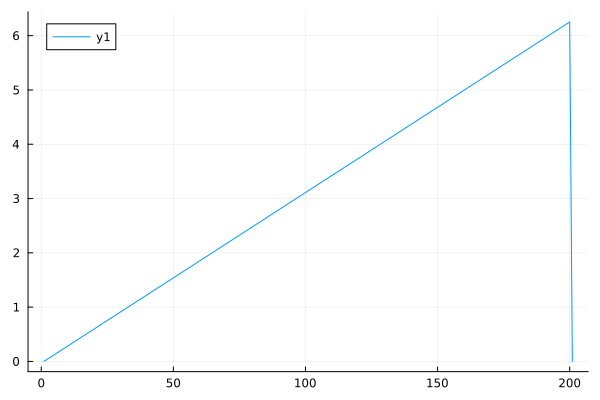

In [146]:
plot(mod.(-1 * angle.(ss), 2*pi))

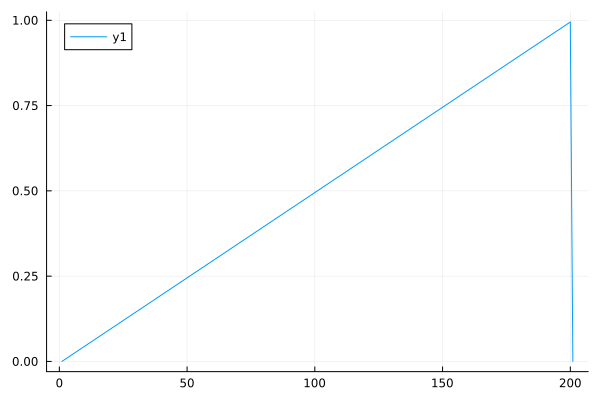

In [148]:
plot(mod.(-1 * angle.(ss), 2*pi) / period_to_angfreq(sa.t_period))

In [151]:
#new u -> t formula

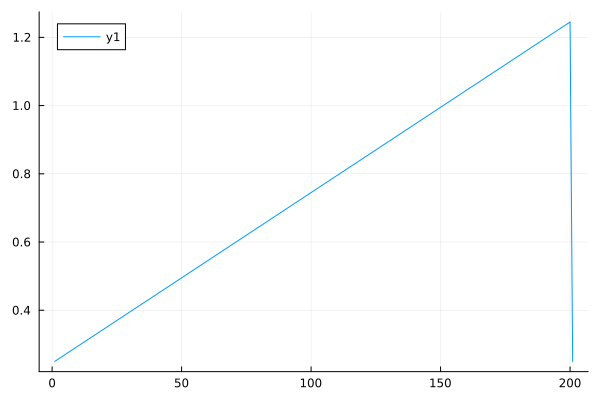

In [150]:
plot((pi / 2 .+ mod.(-1 * angle.(ss), 2*pi)) / period_to_angfreq(sa.t_period))

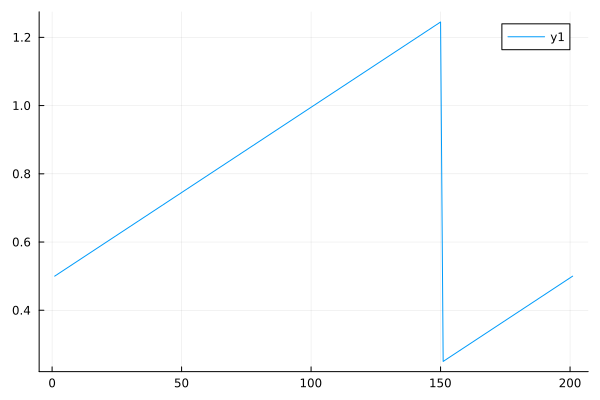

In [192]:
plot((pi /2 .+ mod.(-1 * angle.(ss2), 2*pi)) / period_to_angfreq(sa.t_period))

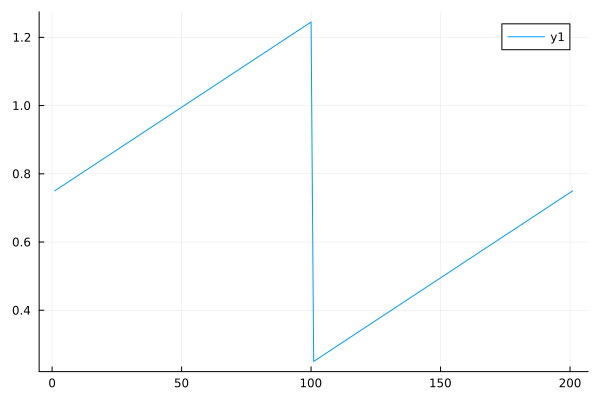

In [197]:
plot((pi /2 .+ mod.(-1 * angle.(us[3][:,1]), 2*pi)) / period_to_angfreq(sa.t_period))

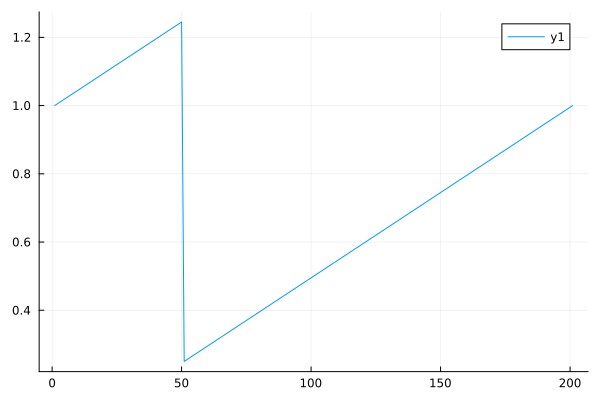

In [198]:
plot((pi /2 .+ mod.(-1 * angle.(us[4][:,1]), 2*pi)) / period_to_angfreq(sa.t_period))

In [18]:
us[1] |> size

(201, 61)

In [19]:
typeof(tms) <: AbstractVector

true

In [20]:
potential_to_phase(us[1], tms, dim=2, offset=0.0, spk_args=sa)

201×61 Matrix{Float64}:
 -1.0    1.0   -1.0   -1.0   -1.0   …   1.0    1.0    1.0    1.0   -1.0
 -0.99  -0.99  -0.99  -0.99  -0.99     -0.99  -0.99  -0.99  -0.99  -0.99
 -0.98  -0.98  -0.98  -0.98  -0.98     -0.98  -0.98  -0.98  -0.98  -0.98
 -0.97  -0.97  -0.97  -0.97  -0.97     -0.97  -0.97  -0.97  -0.97  -0.97
 -0.96  -0.96  -0.96  -0.96  -0.96     -0.96  -0.96  -0.96  -0.96  -0.96
 -0.95  -0.95  -0.95  -0.95  -0.95  …  -0.95  -0.95  -0.95  -0.95  -0.95
 -0.94  -0.94  -0.94  -0.94  -0.94     -0.94  -0.94  -0.94  -0.94  -0.94
 -0.93  -0.93  -0.93  -0.93  -0.93     -0.93  -0.93  -0.93  -0.93  -0.93
 -0.92  -0.92  -0.92  -0.92  -0.92     -0.92  -0.92  -0.92  -0.92  -0.92
 -0.91  -0.91  -0.91  -0.91  -0.91     -0.91  -0.91  -0.91  -0.91  -0.91
 -0.9   -0.9   -0.9   -0.9   -0.9   …  -0.9   -0.9   -0.9   -0.9   -0.9
 -0.89  -0.89  -0.89  -0.89  -0.89     -0.89  -0.89  -0.89  -0.89  -0.89
 -0.88  -0.88  -0.88  -0.88  -0.88     -0.88  -0.88  -0.88  -0.88  -0.88
  ⋮                          

In [21]:
phase_u = [potential_to_phase(us[i], tms, dim=2, offset=offsets[i], spk_args=sa) for i in axes(offsets,1)]

5-element Vector{Matrix{Float64}}:
 [-1.0 0.9999999999999998 … 0.9999999999999989 -0.9999999999999989; -0.9900000000000002 -0.9900000000000001 … -0.9900000000000002 -0.9899999999999983; … ; 0.9900000000000002 0.99 … 0.9900000000000007 0.9900000000000004; -1.0 -1.0 … 0.9999999999999989 -0.999999999999999]
 [-1.0 -1.0 … -0.9999999999999987 -0.9999999999999987; -0.9900000000000002 -0.9900000000000002 … -0.9899999999999984 -0.9900000000000002; … ; 0.9900000000000002 0.9900000000000002 … 0.9900000000000007 0.9900000000000007; -1.0 -1.0 … -0.9999999999999991 -0.9999999999999991]
 [-1.0 -1.0 … -0.9999999999999989 0.9999999999999991; -0.9900000000000001 -0.9899999999999998 … -0.9900000000000004 -0.9900000000000007; … ; 0.9900000000000002 0.9900000000000002 … 0.9900000000000007 0.9900000000000007; -1.0 -1.0 … -0.9999999999999989 -0.9999999999999989]
 [-1.0 -1.0 … 0.9999999999999989 0.9999999999999989; -0.9900000000000001 -0.9899999999999999 … -0.9900000000000007 -0.9900000000000007; … ; 0.99 0.

In [29]:
e3 = map(y -> arc_error.(mapslices(x -> abs.(x .- phases), y, dims=1)), phase_u)

5-element Vector{Matrix{Float64}}:
 [0.0 -1.133107779529596e-15 … -3.797643038629971e-15 3.4878684980086318e-15; 6.975736996017264e-16 3.487868498008632e-16 … 6.975736996017264e-16 5.231802747012947e-15; … ; 6.975736996017264e-16 0.0 … 2.092721098805179e-15 1.3951473992034527e-15; -2.4492935982947064e-16 -2.4492935982947064e-16 … 3.4878684980086318e-15 -2.9094646189298464e-15]
 [0.0 0.0 … 4.185442197610358e-15 4.185442197610358e-15; 6.975736996017264e-16 6.975736996017264e-16 … 4.8830158972120845e-15 6.975736996017264e-16; … ; 6.975736996017264e-16 6.975736996017264e-16 … 2.092721098805179e-15 2.092721098805179e-15; -2.4492935982947064e-16 -2.4492935982947064e-16 … -2.9094646189298464e-15 -2.9094646189298464e-15]
 [0.0 0.0 … 3.4878684980086318e-15 -2.9094646189298464e-15; 3.487868498008632e-16 6.975736996017264e-16 … 1.3951473992034527e-15 2.092721098805179e-15; … ; 6.975736996017264e-16 6.975736996017264e-16 … 2.092721098805179e-15 2.092721098805179e-15; -2.4492935982947064e-16 -2.449

In [30]:
e3 = maximum(maximum.(e3))

9.591638369523738e-15

In [ ]:
#potential to spike

In [49]:
function period_to_angfreq(t_period::Real)
    angular_frequency = 2 * pi / t_period
    return angular_frequency
end

period_to_angfreq (generic function with 1 method)

In [50]:
function offset_to_angle(offset::Real; spk_args::SpikingArgs)
    return (2 * pi) * (offset / spk_args.t_period)
end

offset_to_angle (generic function with 1 method)

In [207]:
function potential_to_time(u::AbstractArray, t::Real; spk_args::SpikingArgs)
    spiking_angle = pi / 2

    #find out given this potential, how much time until the neuron spikes (ideally)
    angles = mod.(-1 .* angle.(u), 2*pi) #flip angles and move onto the positive domain
    arc_to_spike = spiking_angle .+ angles
    time_to_spike = arc_to_spike ./ period_to_angfreq(spk_args.t_period)
    spikes = t .+ time_to_spike
    
    #make all times positive
    spikes[findall(x -> x < 0.0, spikes)] .+= spk_args.t_period
    return spikes
end

potential_to_time (generic function with 2 methods)

In [235]:
function time_to_potential(spikes::AbstractArray, t::Real; spk_args::SpikingArgs)
    spiking_angle = pi / 2

    #find out given this time, what is the (normalized) potential at a given moment?
    time_from_spike = spikes .- t
    arc_from_spike = time_from_spike .* period_to_angfreq(spk_args.t_period)
    angles = -1 .* (arc_from_spike .- spiking_angle)
    potentials = angle_to_complex(angles ./ pi)

    return potentials
end

time_to_potential (generic function with 2 methods)

In [236]:
t0 = potential_to_time(ss, tms[1], spk_args=sa)

201-element Vector{Float64}:
 0.25000000000000006
 0.255
 0.25999999999999995
 0.26500000000000007
 0.2700000000000001
 0.275
 0.28
 0.285
 0.2900000000000001
 0.29499999999999993
 0.30000000000000004
 0.305
 0.3100000000000001
 ⋮
 1.195
 1.2
 1.205
 1.2100000000000002
 1.215
 1.22
 1.225
 1.23
 1.2349999999999999
 1.24
 1.245
 0.25

In [237]:
p01 = angle.(time_to_potential(t0, 0.0, spk_args=sa))

201-element Vector{Float64}:
 -4.440892222079707e-16
 -0.03141592741012578
 -0.06283185482025111
 -0.09424778223037755
 -0.12566370964050336
 -0.15707963705062888
 -0.18849556446075463
 -0.21991149187087997
 -0.25132741928100644
 -0.2827433466911311
 -0.31415927410125755
 -0.3455752015113831
 -0.37699112892150954
  ⋮
  0.34557502666582285
  0.3141590992556973
  0.28274317184557085
  0.2513272444354444
  0.2199113170253198
  0.1884953896151942
  0.15707946220506774
  0.1256635347949431
  0.09424760738481755
  0.0628316799746911
  0.03141575256456466
 -0.0

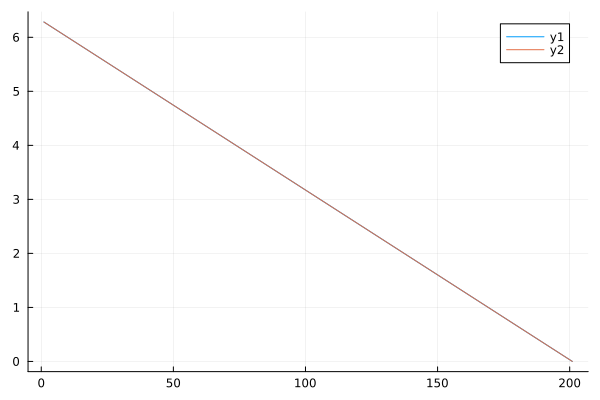

In [238]:
plot(mod.(p01, 2*pi))
plot!(mod.(angle.(phase_to_potential(phases, [0.0,], spk_args=sa, offset=0.0)), 2*pi))

In [202]:
function potential_to_time(u::AbstractArray, ts::AbstractVector; spk_args::SpikingArgs, dim::Int=-1)
    if dim == -1
        dim = ndims(u)
    end
    @assert size(u, dim) == length(ts) "Time dimension of array must match list of times"

    u_slices = eachslice(u, dims=dim)
    spikes = [potential_to_time(x[1], x[2], spk_args=spk_args, offset=offset) for x in zip(u_slices, ts)]
    spikes = stack(spikes, dims=dim)
    return spikes
end

potential_to_time (generic function with 2 methods)

In [203]:
potential_to_time(us[1], tms, spk_args = sa, offset = 0.0)

201×61 Matrix{Float64}:
 0.25   1.25   1.25   1.25   1.25   …  6.25   6.25   6.25   6.25   6.25
 0.255  1.255  1.255  1.255  1.255     6.255  6.255  6.255  6.255  6.255
 0.26   1.26   1.26   1.26   1.26      6.26   6.26   6.26   6.26   6.26
 0.265  1.265  1.265  1.265  1.265     6.265  6.265  6.265  6.265  6.265
 0.27   1.27   1.27   1.27   1.27      6.27   6.27   6.27   6.27   6.27
 0.275  1.275  1.275  1.275  1.275  …  6.275  6.275  6.275  6.275  6.275
 0.28   1.28   1.28   1.28   1.28      6.28   6.28   6.28   6.28   6.28
 0.285  1.285  1.285  1.285  1.285     6.285  6.285  6.285  6.285  6.285
 0.29   1.29   1.29   1.29   1.29      6.29   6.29   6.29   6.29   6.29
 0.295  1.295  1.295  1.295  1.295     6.295  6.295  6.295  6.295  6.295
 0.3    1.3    1.3    1.3    1.3    …  6.3    6.3    6.3    6.3    6.3
 0.305  1.305  1.305  1.305  1.305     6.305  6.305  6.305  6.305  6.305
 0.31   1.31   1.31   1.31   1.31      6.31   6.31   6.31   6.31   6.31
 ⋮                                 

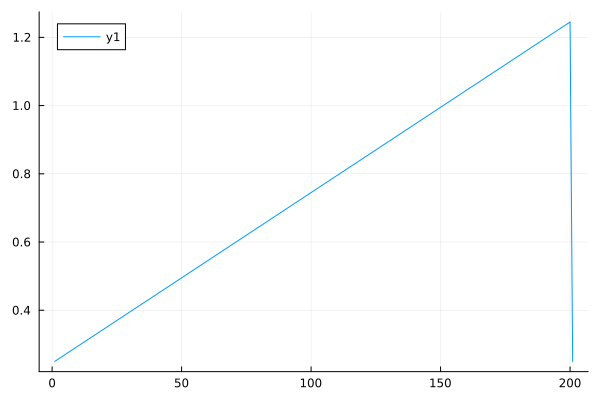

In [204]:
plot(potential_to_time(us[1], tms, spk_args = sa, offset = offsets[1])[:,1])

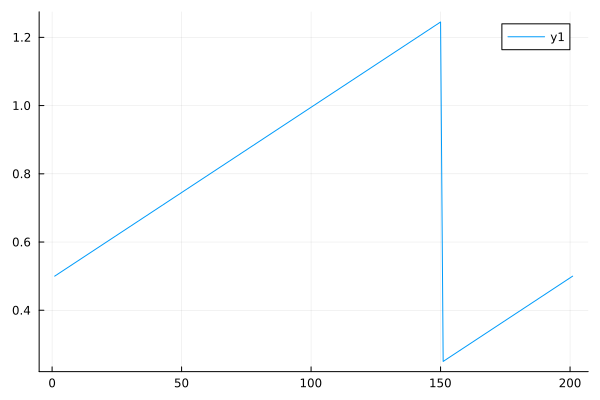

In [206]:
plot(potential_to_time(us[2], tms, spk_args = sa, offset = offsets[2])[:,1])

In [ ]:
us[2]

In [86]:
ss = us[1][:,1]

201-element Vector{ComplexF64}:
                1.0 - 2.4492935982947064e-16im
 0.9995065603657316 - 0.03141075907812836im
 0.9980267284282716 - 0.06279051952931326im
   0.99556196460308 - 0.09410831331851491im
 0.9921147013144778 - 0.12533323356430465im
 0.9876883405951377 - 0.15643446504023112im
 0.9822872507286887 - 0.18738131458572468im
 0.9759167619387474 - 0.21814324139654243im
  0.968583161128631 - 0.24868988716485535im
 0.9602936856769432 - 0.2789911060392288im
 0.9510565162951535 - 0.3090169943749476im
 0.9408807689542255 - 0.3387379202452914im
 0.9297764858882511 - 0.3681245526846787im
                    ⋮
 0.9408807689542255 + 0.3387379202452913im
 0.9510565162951536 + 0.30901699437494734im
 0.9602936856769431 + 0.27899110603922916im
 0.9685831611286312 + 0.24868988716485463im
 0.9759167619387474 + 0.2181432413965424im
 0.9822872507286886 + 0.18738131458572477im
 0.9876883405951377 + 0.156434465040231im
 0.9921147013144778 + 0.12533323356430437im
   0.99556196460308 + 0.094

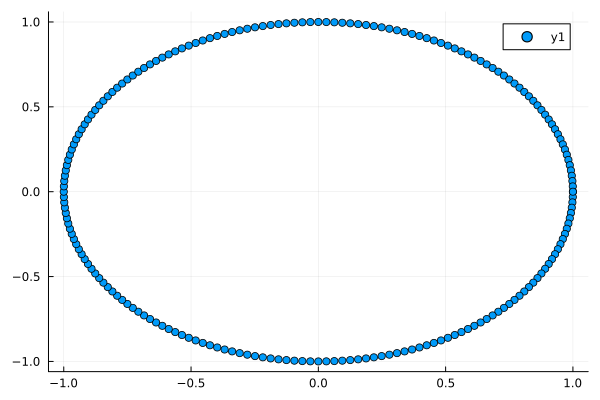

In [87]:
scatter(real.(ss), imag.(ss))

In [88]:
angle(1 + 0im)

0.0

In [89]:
angle(-1 + 0im)

3.141592653589793

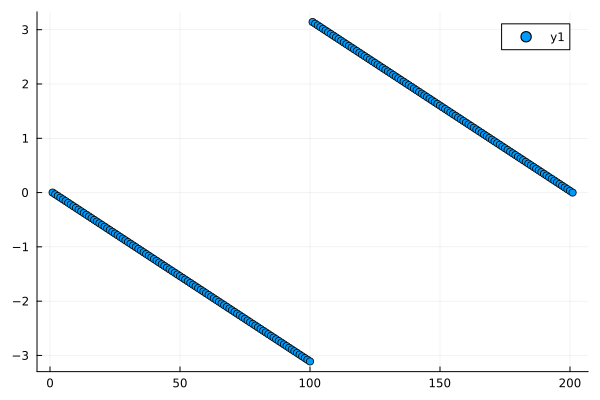

In [90]:
scatter(angle.(ss))

In [99]:
t1 = potential_to_time(ss, tms[1], spk_args=sa, offset = 0.0)

201-element Vector{Float64}:
 3.8981718325193755e-17
 0.0050000000000000105
 0.009999999999999983
 0.015000000000000095
 0.020000000000000063
 0.02500000000000004
 0.030000000000000006
 0.034999999999999976
 0.0400000000000001
 0.04499999999999992
 0.05000000000000004
 0.055000000000000014
 0.06000000000000013
 ⋮
 0.945
 0.95
 0.9550000000000001
 0.9600000000000001
 0.9650000000000001
 0.97
 0.975
 0.98
 0.985
 0.99
 0.995
 0.0

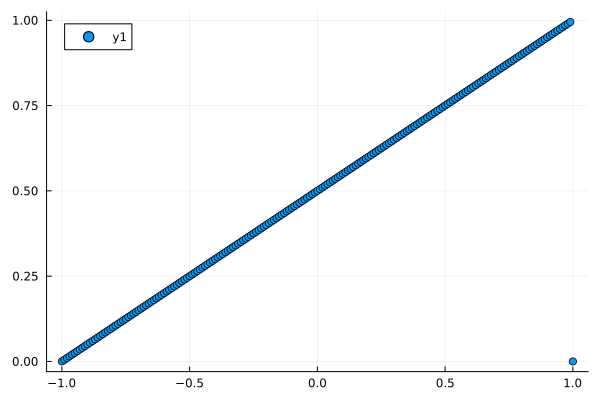

In [100]:
scatter(phases, t1)